# Capstone Project - The Battle of the Neighborhoods


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an arabic restaurant in **Kuwait** .

Since there are lots of arabic  restaurants in Kuwait we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no arabicrestaurants in vicinity. We would also prefer locations as close to sea front as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:

number of existing restaurants in the neighborhood (any type of restaurant)
number of and distance to arabic restaurants in the neighborhood, if any .
Following data sources will be needed to extract/generate the required information:
the information is not easy aviliable on internet .

centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using **Nominatim geocoding**
number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

In [1]:
#!conda install -c conda-forge geopy --yes

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import matplotlib
import folium # plotting library
from sklearn.cluster import KMeans

import matplotlib.colors as colors
import matplotlib.cm as cm


### Befor importing data , and from http://gis.paci.gov.kw/Client//EN/Default.aspx 
#### this is a list of neighborhoods in Kuwait 

In [3]:
seaArealist=['kuwait , Qibla , block 1','kuwait , Qibla , block 2','kuwait , Qibla , block 3','kuwait , Qibla , block 4','kuwait , Qibla , block 5','kuwait , Qibla , block 6','kuwait , Qibla , block 7','kuwait , Qibla , block 8','kuwait , Qibla , block 9','kuwait , Qibla , block 10','kuwait , Qibla , block 11','kuwait , Qibla , block 12','kuwait , Qibla , block 13','kuwait , Qibla , block 14','kuwait , Qibla , block 15',
             'kuwait , Sharq , block 1','kuwait , Sharq , block 2','kuwait , Sharq , block 3','kuwait , Sharq , block 4','kuwait , Sharq , block 5','kuwait , Sharq , block 6','kuwait , Sharq , block 7','kuwait , Sharq , block 8',
             'kuwait, Mirqab , block 1','kuwait, Mirqab , block 2','kuwait, Mirqab , block 3',
             'kuwait ,Dasman ,block 1 ','kuwait ,Dasman , block 2','kuwait ,Dasman , block 3',
             'kuwait ,بنيد القار ,block 1 ','kuwait ,بنيد القار ,block 2 ','kuwait ,بنيد القار ,block 3 ',
             'kuwait ,Daiya , block 1','kuwait ,Daiya , block 2','kuwait ,Daiya , block 3','kuwait ,Daiya , block 4','kuwait ,Daiya , block 5',
             'kuwait ,Shaab , block 1','kuwait ,Shaab , block 2','kuwait ,Shaab , block 3','kuwait ,Shaab , block 4','kuwait ,Shaab , block 5','kuwait ,Shaab , block 6','kuwait ,Shaab , block 7','kuwait ,Shaab , block 8',
             'kuwait , Salmiya , block 1','kuwait , Salmiya , block 2','kuwait , Salmiya , block 3','kuwait , Salmiya , block 4','kuwait , Salmiya , block 5','kuwait , Salmiya , block 6','kuwait , Salmiya , block 7','kuwait , Salmiya , block 8','kuwait , Salmiya , block 9','kuwait , Salmiya , block 10','kuwait , Salmiya , block 11','kuwait , Salmiya , block 12'
            ]


### Get the KUWAIT's latitude and longitude values.

In [4]:
address = 'kuwait'
geolocator =  Nominatim(user_agent="myGeocoder")
location = geolocator.geocode('kuwait')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kuwait are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kuwait are 29.2733964, 47.4979476.


#### let us make a dataframe for our Neighborhoods

In [5]:
column_names = ['Borough','Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)
 
for i in seaArealist :
    geolocator =  Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(i)
    neighborhood_lat = location.latitude
    neighborhood_lon = location.longitude
    #print('The geograpical coordinate of'+ i + '  are {}, {}.'.format(neighborhood_lat, neighborhood_lon))
    
    neighborhoods = neighborhoods.append({'Borough': i.split(',')[1],
                                          'Neighborhood': i,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
   # geokw.append(latitude)
   # geokw.append(longitude)

    #dfname["latitude","longitude"]=latitude,longitude

change the arabic borough's name "بنيد القار " to "Bnied Al-Gar" 

In [6]:
neighborhoods['Borough'].iloc[29:32]='Bnied Al-Gar'
neighborhoods.head()

C:\Users\RAMITTO\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Borough,Neighborhood,Latitude,Longitude
0,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216
1,Qibla,"kuwait , Qibla , block 2",29.377828,47.972750
2,Qibla,"kuwait , Qibla , block 3",29.373951,47.970914
3,Qibla,"kuwait , Qibla , block 4",29.375175,47.972843
4,Qibla,"kuwait , Qibla , block 5",29.376554,47.974659


###### save data as  'neighborhoods_kw.csv

In [7]:

neighborhoods.to_csv('neighborhoods_kw.csv', index=False)


In [8]:
neighborhoods=pd.read_csv('neighborhoods_kw.csv')
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216
1,Qibla,"kuwait , Qibla , block 2",29.377827,47.972750
2,Qibla,"kuwait , Qibla , block 3",29.373951,47.970914
3,Qibla,"kuwait , Qibla , block 4",29.375175,47.972843
4,Qibla,"kuwait , Qibla , block 5",29.376554,47.974659


#### How many neighborhoods in each borough ? 
#### So we plot it 


In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhoods in each borough ')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of  Neighborhoods ', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


<Figure size 900x500 with 1 Axes>

##### The two largest boroughs in terms of number of neighborhoods are Qibla and Salmiya 

#### we can use folium to show where are on  a map

In [10]:
location_kw=[29.3522,48.019]
map_kuwait = folium.Map(location_kw, zoom_start=13)
for lat, lng, Neighbor in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(Neighbor)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_kuwait) 
map_kuwait

There is a density here in some neighborhoods in the metropolitan area (at the top of the map)

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info in each neighborhood.



In [31]:
CLIENT_ID = '######################################' # your Foursquare ID . I replace it with "######################"
CLIENT_SECRET = '#########################################' # your Foursquare Secret .. I replace it with "######################"
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ######################################
CLIENT_SECRET:#########################################


## 2. Explore Neighborhoods in Sea front


### Now, let's get the top 200 venues that are in all the neighborhoods in  within a radius of 750 meters.
#### Let's create a function to repeat the same process to all the neighborhoods in Sea front .

In [12]:
LIMIT=200
def getNearbyVenues(boroughs ,names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for bor , name, lat, lng in zip(boroughs ,names, latitudes, longitudes):
       # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            bor,
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'id',          
                  'VenueLatitude', 
                  'VenueLongitude', 
                  'VenueCategory',
                  'VenueCategory_id' ]
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *seafront_venues*.

In [13]:
seafront_venues = getNearbyVenues(boroughs=neighborhoods['Borough'],
                                  names=neighborhoods['Neighborhood'],
                                  latitudes=neighborhoods['Latitude'],
                                  longitudes=neighborhoods['Longitude']
                                  )

In [14]:
seafront_venues.to_csv('seafront_venues.csv', index=False)


In [15]:
seafront_venues=pd.read_csv('seafront_venues.csv')


In [30]:
# rename arabic names
seafront_venues=seafront_venues.replace(['kuwait ,بنيد القار ,block 1 ','kuwait ,بنيد القار ,block 2 ','kuwait ,بنيد القار ,block 3 '],['kuwait,Bnied Al-Gar,block 1','kuwait,Bnied Al-Gar,block 2','kuwait,Bnied Al-Gar,block 3'])  

print(seafront_venues.shape)

seafront_venues.head()

(4326, 10)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,VenueLatitude,VenueLongitude,VenueCategory,VenueCategory_id
0,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216,Slider Station (سلايدر ستيشن),4ba76646f964a520d99039e3,29.376620,47.969198,American Restaurant,4bf58dd8d48988d14e941735
1,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216,Let's Coffee (ليتس كوفي),57ab4a06498e09bfda1826eb,29.376260,47.970687,Café,4bf58dd8d48988d16d941735
2,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216,Elevation Burger,573fdc47cd10ca9f9a797109,29.377158,47.969912,Burger Joint,4bf58dd8d48988d16c941735
3,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216,M.E’AT,5a0761ae1108ba3799978ac8,29.377091,47.969866,Middle Eastern Restaurant,4bf58dd8d48988d115941735
4,Qibla,"kuwait , Qibla , block 1",29.376559,47.970216,DOH!,5b5f302eb6b04b002c46a083,29.373696,47.970047,Donut Shop,4bf58dd8d48988d148941735


### from : https://developer.foursquare.com/docs/build-with-foursquare/categories/
 Category IDs corresponding to Arabic or  Middle Eastern Restaurants were taken from Foursquare web site 


In [17]:
restaurant_words = ['4bf58dd8d48988d115941735','5bae9231bedf3950379f89e1','5bae9231bedf3950379f89e7' ,'58daa1558bbb0b01f18ec1cd',
                    '5bae9231bedf3950379f89da','5bae9231bedf3950379f89ea','4bf58dd8d48988d1c4941735','5283c7b4e4b094cb91ec88d7',
                   '4bf58dd8d48988d1ce941735']

seafront_restaurant=seafront_venues[seafront_venues['VenueCategory_id'].isin(restaurant_words) ]
    

# let us remove duplicate Restaurant
seafront_restaurant=seafront_restaurant.drop_duplicates(['id'], keep='last')

In [18]:
seafront_restaurant=seafront_restaurant.reset_index(level=0, drop=True)


In [19]:
seafront_restaurant[100:160]


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,VenueLatitude,VenueLongitude,VenueCategory,VenueCategory_id
100,Shaab,"kuwait ,Shaab , block 8",29.351237,48.029589,Sauce Restaurant,524862fc11d250184fb063ec,29.348953,48.033380,Restaurant,4bf58dd8d48988d1c4941735
101,Shaab,"kuwait ,Shaab , block 8",29.351237,48.029589,مطعم مقرمشة للشورما,4cc859350fa2721e7f7363b1,29.348685,48.030544,Middle Eastern Restaurant,4bf58dd8d48988d115941735
102,Shaab,"kuwait ,Shaab , block 8",29.351237,48.029589,Al-Sanawbar Lebanese Restaurant /الصنوبر مطعم ...,4fe43f23e4b043458f416bae,29.349123,48.036665,Restaurant,4bf58dd8d48988d1c4941735
103,Salmiya,"kuwait , Salmiya , block 1",29.347233,48.097148,Aubergine Restaurant & Cafe,4ed7cc632c5b95fea2391b60,29.347915,48.089485,Middle Eastern Restaurant,4bf58dd8d48988d115941735
104,Salmiya,"kuwait , Salmiya , block 1",29.347233,48.097148,Beit sitti,4c01133c9a950f47547c08c6,29.349674,48.095140,Restaurant,4bf58dd8d48988d1c4941735
105,Salmiya,"kuwait , Salmiya , block 2",29.345993,48.087939,قصر السرايا,4dac7dea1e72c1ab9c202b35,29.347970,48.087524,Restaurant,4bf58dd8d48988d1c4941735
106,Salmiya,"kuwait , Salmiya , block 2",29.345993,48.087939,مطعم زمان اول,4c9cc5478afca093b936f015,29.347578,48.091433,Middle Eastern Restaurant,4bf58dd8d48988d115941735
107,Salmiya,"kuwait , Salmiya , block 2",29.345993,48.087939,Ayam Zaman,516078c5498eebfeac33387b,29.346669,48.094137,Middle Eastern Restaurant,4bf58dd8d48988d115941735
108,Salmiya,"kuwait , Salmiya , block 3",29.339983,48.089982,Mashawi wrap & roll,55bf9501498e0546f08b8ce0,29.337596,48.086755,Middle Eastern Restaurant,4bf58dd8d48988d115941735
109,Salmiya,"kuwait , Salmiya , block 3",29.339983,48.089982,MAN'OUSHE (منقوشة),5217ca7911d28f3e10f14e87,29.342757,48.092537,Middle Eastern Restaurant,4bf58dd8d48988d115941735


In [20]:
seafront_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
Borough                   163 non-null object
Neighborhood              163 non-null object
Neighborhood Latitude     163 non-null float64
Neighborhood Longitude    163 non-null float64
Venue                     163 non-null object
id                        163 non-null object
VenueLatitude             163 non-null float64
VenueLongitude            163 non-null float64
VenueCategory             163 non-null object
VenueCategory_id          163 non-null object
dtypes: float64(4), object(6)
memory usage: 12.8+ KB


###### Let's check how many venues were returned for each neighborhood

In [21]:
map_kuwait_venues = folium.Map(location_kw, zoom_start=13)



for lat, lng, VenueCat in zip(seafront_restaurant['VenueLatitude'], seafront_restaurant['VenueLongitude'], seafront_restaurant['Venue']):
    label = '{}'.format(VenueCat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kuwait_venues) 
map_kuwait_venues


There are 3 restaurants outside the studied areas, but this will be nothing we will leave in our data.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of kuwait that have low restaurant density,
 particularly those with low number of arabic restaurants. We will limit our analysis to seafront and thhe nearst neighborhoods  .

In first step we have collected the required data: **location and type (category) of every venue** .then we find the  restaurants (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of 'restaurant density' across different areas of  seafront , we will use heatmaps to identify a few promising areas.

In third and final step we will focus on low density  areas .

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

##### let's see the heat map 

In [22]:
from folium import plugins
from folium.plugins import HeatMap
map_kuwait_venues = folium.Map(location_kw, zoom_start=13)

restaurant_latlons = [[seafront_restaurant['VenueLatitude'][row],  seafront_restaurant['VenueLongitude'][row]] for row in seafront_restaurant.index]

#HeatMap(restaurant_latlons).add_to(map_kuwait_venues)


#for lat, lng in zip(seafront_restaurant['VenueLatitude'], seafront_restaurant['VenueLongitude']):
HeatMap(restaurant_latlons).add_to(map_kuwait_venues)
map_kuwait_venues

#### Let's find out how many unique categories can be curated from all the returned venues

In [23]:
seafront_restaurant.groupby('Neighborhood').count()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,id,VenueLatitude,VenueLongitude,VenueCategory,VenueCategory_id
Neighborhood,,,,,,,,,
"kuwait , Qibla , block 11",1,1,1,1,1,1,1,1,1
"kuwait , Qibla , block 14",12,12,12,12,12,12,12,12,12
"kuwait , Qibla , block 15",12,12,12,12,12,12,12,12,12
"kuwait , Qibla , block 2",1,1,1,1,1,1,1,1,1
"kuwait , Qibla , block 5",1,1,1,1,1,1,1,1,1
"kuwait , Salmiya , block 1",2,2,2,2,2,2,2,2,2
"kuwait , Salmiya , block 10",1,1,1,1,1,1,1,1,1
"kuwait , Salmiya , block 11",6,6,6,6,6,6,6,6,6
"kuwait , Salmiya , block 12",3,3,3,3,3,3,3,3,3


#### Number of Arabic Resturants for each Borough in Kuwait City

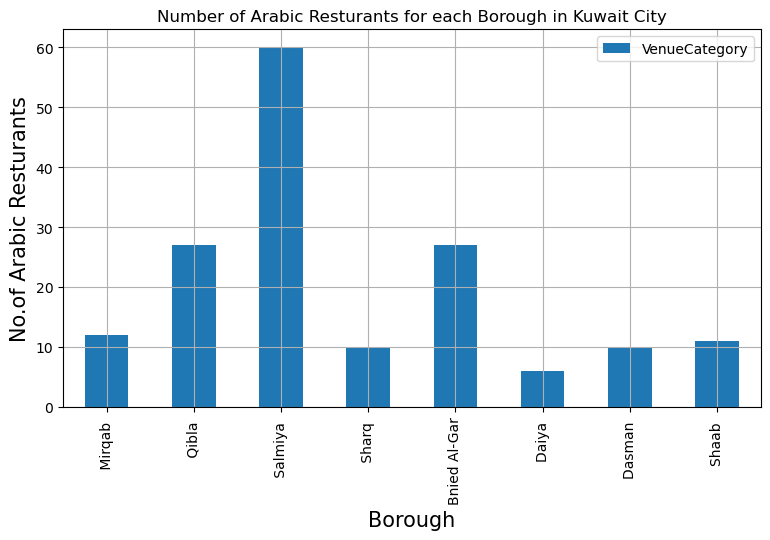

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Arabic Resturants for each Borough in Kuwait City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Arabic Resturants', fontsize=15)

#giving a bar plot
seafront_restaurant.groupby('Borough')['VenueCategory'].count().plot(kind='bar')
#legend
plt.legend()
plt.grid(True)
#displays the plot
plt.show()

#### Number of Arabic Resturants for each Neighborhood in Kuwait City

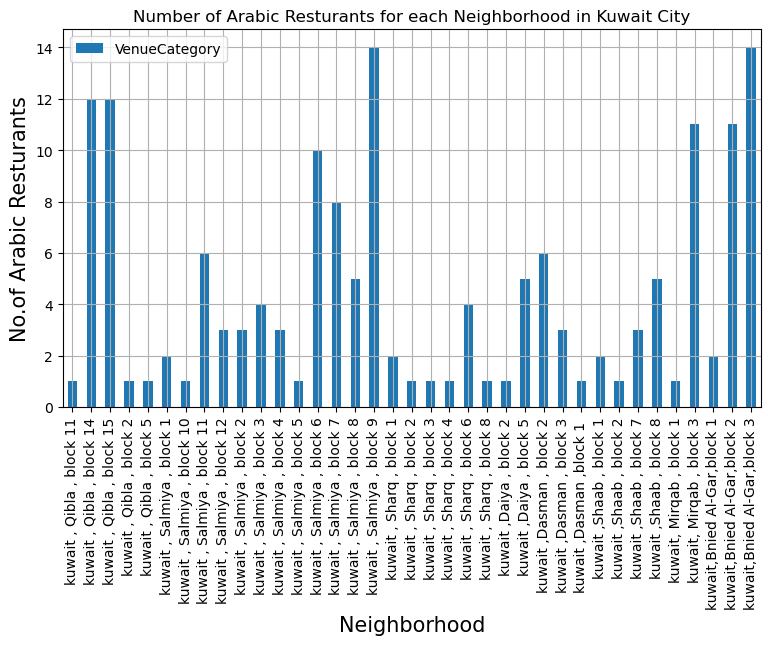

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Arabic Resturants for each Neighborhood in Kuwait City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Arabic Resturants', fontsize=15)

#giving a bar plot
seafront_restaurant.groupby('Neighborhood')['VenueCategory'].count().plot(kind='bar')
#legend
plt.legend()
plt.grid(True)
#displays the plot
plt.show()

In [26]:
from sklearn.cluster import KMeans

number_of_clusters = 8

good_erea = seafront_restaurant[['VenueLatitude','VenueLongitude' ]].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_erea)

In [27]:
cluster_centers = [(cc[0], cc[1]) for cc in kmeans.cluster_centers_]
cluster_centers

[(29.336359254383048, 48.063141473373975),
 (29.373713606315786, 47.99914373463624),
 (29.375832101662198, 47.97498511377643),
 (29.344769793043568, 48.03708970273791),
 (29.33631904771993, 48.086302210601275),
 (29.36279738000406, 47.961057532173946),
 (29.357548600269386, 48.02135633009208),
 (29.38648555472028, 47.997201051154775)]

In [28]:

map_kuwait_venues = folium.Map(location_kw, zoom_start=13)
for lat, lon in cluster_centers:
    folium.Circle([lat, lon], radius=700, color='green', fill=True, fill_opacity=0.25).add_to(map_kuwait_venues) 
    
map_kuwait_venues

## Results and Discussion <a name="results"></a>

when we try number_of_clusters = from 2 to 8 as the number of Neighborhoods ,
We found that there are at least four areas with less restaurant density.
There are at least two areas in Salmiya, the third in Daiya and the fourth in Dasman

### Let's set it on the map

In [32]:
best_places =[(29.391411, 47.993347),
              (29.344757, 48.078212),
              (29.342186, 48.050193) ,
              (29.369583, 48.013710)]
map_kuwait_venues = folium.Map(location_kw, zoom_start=13)
for lat, lon in best_places:
    folium.Circle([lat, lon], radius=700, color='blue', fill=True, fill_opacity=0.25).add_to(map_kuwait_venues) 
    
map_kuwait_venues

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify seafront in kuwait (particularly Arabic restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Arabic restaurant.
By setting the density distribution of restaurants on the map from the Foursquare data, we first identified public neighborhoods and then through heat maps we found the top four regions.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.


### best regards : RAMI BEZKADI